In [1]:
# imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split  # this is a typo in the course. it has sklearn.cross_validation instead of sklearn.model_selection.

In [2]:
# data
df = pd.read_csv('Credit_One_Clean.csv')
df.head()

,Amount_Credit,Gender,Education,Marital_Status,Age,Pmt_SEPT,Pmt_AUG,Pmt_JUL,Pmt_JUN,Pmt_MAY,...,Owed_JUN,Owed_MAY,Owed_APR,Prev_SEPT,Prev_AUG,Prev_JUL,PrevJUN,Prev_MAY,Prev_APR,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Amount_Credit   30201 non-null  int64
 1   Gender          30201 non-null  int64
 2   Education       30201 non-null  int64
 3   Marital_Status  30201 non-null  int64
 4   Age             30201 non-null  int64
 5   Pmt_SEPT        30201 non-null  int64
 6   Pmt_AUG         30201 non-null  int64
 7   Pmt_JUL         30201 non-null  int64
 8   Pmt_JUN         30201 non-null  int64
 9   Pmt_MAY         30201 non-null  int64
 10  Pmt_APR         30201 non-null  int64
 11  Owed_SEPT       30201 non-null  int64
 12  Owed_AUG        30201 non-null  int64
 13  Owed_JUL        30201 non-null  int64
 14  Owed_JUN        30201 non-null  int64
 15  Owed_MAY        30201 non-null  int64
 16  Owed_APR        30201 non-null  int64
 17  Prev_SEPT       30201 non-null  int64
 18  Prev_AUG        30201 non-

In [4]:
X = df.iloc[:,1:5]
print('Summary of Features')
X.head()

Summary of Features


,Gender,Education,Marital_Status,Age
0,2,2,1,24
1,2,2,2,26
2,2,2,2,34
3,2,2,1,37
4,1,2,1,57


In [5]:
y = df['Y']
y

0        1
1        1
2        0
3        0
4        0
        ..
30196    0
30197    0
30198    1
30199    1
30200    1
Name: Y, Length: 30201, dtype: int64

In [6]:
model = LinearRegression(n_jobs=10)

In [7]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [8]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [9]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.025294719543500488
Linear Regression 0.001235315244116945
Support Vector Regression -0.0856654014894278


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

algo = SVR()
model = algo.fit(X_train,y_train)

In [11]:
predictions = model.predict(X_test)

In [12]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.086
RMSE: 0.433


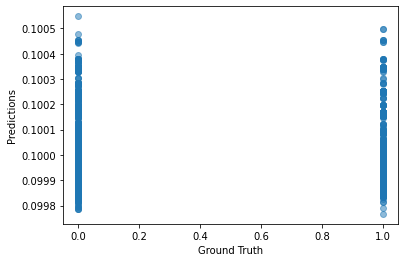

In [13]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [14]:
df.head()

,Amount_Credit,Gender,Education,Marital_Status,Age,Pmt_SEPT,Pmt_AUG,Pmt_JUL,Pmt_JUN,Pmt_MAY,...,Owed_JUN,Owed_MAY,Owed_APR,Prev_SEPT,Prev_AUG,Prev_JUL,PrevJUN,Prev_MAY,Prev_APR,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
X = df.drop(columns=['Amount_Credit', 'Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR', 'Y'])

In [29]:
y = df['Amount_Credit']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
algo = SVR()
model = algo.fit(X_train,y_train)

In [32]:
predictions = model.predict(X_test)

In [33]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.036
RMSE: 131036.470


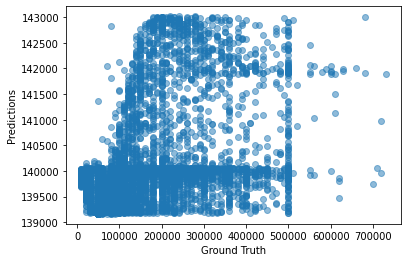

In [34]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();